# Evolució dels preus del lloger en Barcelona, des de 2014 fins a 2018
**Fa servir el dataset de dades oficial de OpenData BCN.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
        
def old_float(str):
    try: 
        return float(str.replace('.','').replace(',','.'))
    except:
        return 0

def new_float(str):
    try: 
        return float(str)
    except:
        return 0
    
CONVERTERS_OLD = {
    "1r Trimestre": old_float,
    "2n Trimestre": old_float,
    "3r Trimestre": old_float,
    "4rt Trimestre": old_float,
    
    "1r Trimestre.1": old_float,
    "2n Trimestre.1": old_float,
    "3r Trimestre.1": old_float,
    "4rt Trimestre.1": old_float,
    
    "Acumulat/1r Trimestre": old_float,
    "Acumulat/2n Trimestre": old_float,
    "Acumulat/3r Trimestre": old_float,
    "Acumulat/4rt Trimestre": old_float
}

CONVERTERS_NEW = {
    "1r Trimestre": new_float,
    "2n Trimestre": new_float,
    "3r Trimestre": new_float,
    "4rt Trimestre": new_float,
    
    "1r Trimestre.1": new_float,
    "2n Trimestre.1": new_float,
    "3r Trimestre.1": new_float,
    "4rt Trimestre.1": new_float,
    
    "Acumulat/1r Trimestre": new_float,
    "Acumulat/2n Trimestre": new_float,
    "Acumulat/3r Trimestre": new_float,
    "Acumulat/4rt Trimestre": new_float
}

In [2]:
def parse_old_rent_dataset(df_name):
    df = pd.read_csv("../lib/avg-rent-eur-month/" + df_name, thousands=".", decimal=",", converters=CONVERTERS_OLD)
    return df.rename(columns={"1r Trimestre.1": "Acumulat/1r Trimestre", "2n Trimestre.1": "Acumulat/2n Trimestre", "3r Trimestre.1": "Acumulat/3r Trimestre", "4rt Trimestre.1": "Acumulat/4rt Trimestre"})[1:]

def parse_rent_dataset(df_name):
    return pd.read_csv("../lib/avg-rent-eur-month/" + df_name, converters=CONVERTERS_NEW)

def normalize(df, year):
    to_drop = ['Acumulat/1r Trimestre', 'Acumulat/2n Trimestre', 'Acumulat/3r Trimestre', 'Acumulat/4rt Trimestre', 'Dte.']
    df = df.drop(axis="columns", labels=to_drop)
    
    cols = ['1r Trimestre', '2n Trimestre', '3r Trimestre', '4rt Trimestre']
    for period in cols:
        rename_op = {}
        rename_op[period] = year + "/" + period
        df = df.rename(columns=rename_op)
        
    return df

def merge_rates(*dfs):
    df = dfs[0]
    for d in dfs[1:]:
        df = df.merge(d, how="left", on="Barris")
    
    return df

In [3]:
monthly_rate_2014 = parse_old_rent_dataset("2014.csv")
monthly_rate_2015 = parse_old_rent_dataset("2015.csv")
monthly_rate_2016 = parse_old_rent_dataset("2016.csv")
monthly_rate_2017 = parse_rent_dataset("2017.csv")
monthly_rate_2018 = parse_rent_dataset("2018.csv")

monthly_rate_2014 = normalize(monthly_rate_2014, '2014')
monthly_rate_2015 = normalize(monthly_rate_2015, '2015')
monthly_rate_2016 = normalize(monthly_rate_2016, '2016')
monthly_rate_2017 = normalize(monthly_rate_2017, '2017')
monthly_rate_2018 = normalize(monthly_rate_2018, '2018')

all_monthly_rates = merge_rates(monthly_rate_2014, monthly_rate_2015, monthly_rate_2016, monthly_rate_2017, monthly_rate_2018)
all_monthly_rates = all_monthly_rates.fillna(0)

In [4]:
with_ratio = all_monthly_rates.copy()
with_ratio['Creixement Total'] = with_ratio['2018/4rt Trimestre'] - with_ratio['2014/1r Trimestre']

with_ratio = with_ratio[['Barris', '2014/1r Trimestre', '2018/4rt Trimestre', 'Creixement Total']].rename(columns={'2014/1r Trimestre': "Primer Preu", '2018/4rt Trimestre': "Ultim Preu"})
with_ratio['Creixement %'] = (with_ratio['Creixement Total'] / with_ratio['Ultim Preu']) * 100

with_ratio = with_ratio[with_ratio["Primer Preu"] != 0]
with_ratio = with_ratio[with_ratio["Ultim Preu"] != 0]

## Barris mes cars

In [10]:
with_ratio.sort_values('Ultim Preu', ascending=False).reset_index(drop=True).head(5)

,Barris,Primer Preu,Ultim Preu,Creixement Total,Creixement %
0,21. Pedralbes,1230.00,1615.31,385.31,23.853626
1,24. les Tres Torres,1215.85,1567.91,352.06,22.454095
2,23. Sarrià,1042.16,1422.80,380.64,26.752882
3,26. Sant Gervasi - Galvany,1053.70,1374.82,321.12,23.357239
4,7. la Dreta de l'Eixample,921.40,1340.38,418.98,31.258300


## Barris mes barats

In [11]:
with_ratio.sort_values('Ultim Preu', ascending=True).reset_index(drop=True).head(5)

,Barris,Primer Preu,Ultim Preu,Creixement Total,Creixement %
0,55. Ciutat Meridiana,359.27,514.52,155.25,30.173754
1,57. la Trinitat Vella,461.10,564.56,103.46,18.325776
2,53. la Trinitat Nova,442.94,575.38,132.44,23.017832
3,50. les Roquetes,461.28,595.81,134.53,22.579346
4,51. Verdun,503.47,649.22,145.75,22.450017


## Llista ordenada de barris basat en el preu absolut de creixement del lloguer

In [5]:
with_ratio.sort_values('Creixement Total', ascending=False).reset_index(drop=True)

,Barris,Primer Preu,Ultim Preu,Creixement Total,Creixement %
0,69. Diagonal Mar i el Front Marítim del Poblenou,866.70,1307.79,441.09,33.727892
1,7. la Dreta de l'Eixample,921.40,1340.38,418.98,31.258300
2,21. Pedralbes,1230.00,1615.31,385.31,23.853626
3,23. Sarrià,1042.16,1422.80,380.64,26.752882
4,3. la Barceloneta,540.71,913.20,372.49,40.789531
5,67. la Vila Olímpica del Poblenou,926.43,1292.23,365.80,28.307654
6,71. Provençals del Poblenou,635.70,999.63,363.93,36.406470
7,25. Sant Gervasi - la Bonanova,927.63,1283.24,355.61,27.711886
8,24. les Tres Torres,1215.85,1567.91,352.06,22.454095
9,2. el Barri Gòtic,712.79,1057.26,344.47,32.581390


## Llista ordenada de barris basat en el ratio de creixement del lloguer

In [6]:
with_ratio.sort_values('Creixement %', ascending=False).reset_index(drop=True)

,Barris,Primer Preu,Ultim Preu,Creixement Total,Creixement %
0,3. la Barceloneta,540.71,913.20,372.49,40.789531
1,71. Provençals del Poblenou,635.70,999.63,363.93,36.406470
2,69. Diagonal Mar i el Front Marítim del Poblenou,866.70,1307.79,441.09,33.727892
3,"4. Sant Pere, Santa Caterina i la Ribera",673.44,1000.52,327.08,32.691001
4,2. el Barri Gòtic,712.79,1057.26,344.47,32.581390
5,64. el Camp de l'Arpa del Clot,580.09,851.58,271.49,31.880739
6,30. la Salut,634.48,930.09,295.61,31.782946
7,38. la Teixonera,492.79,721.23,228.44,31.673669
8,68. el Poblenou,663.93,970.64,306.71,31.598739
9,46. el Turó de la Peira,475.06,692.05,216.99,31.354671


## Grafica de linees de creixement per barri

/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


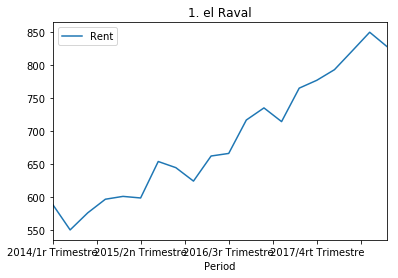

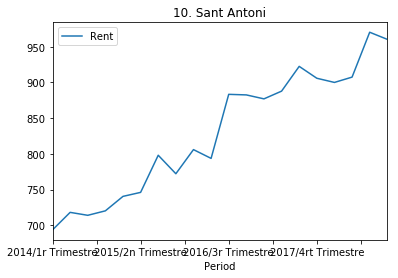

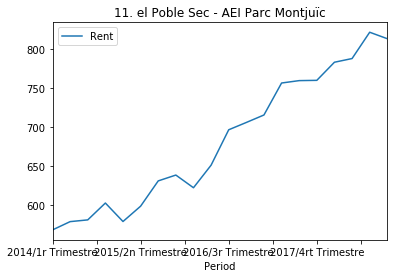

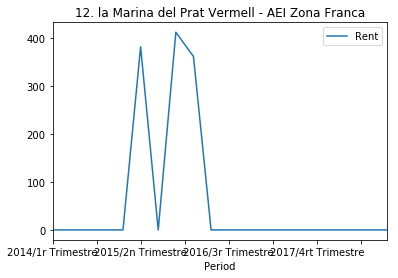

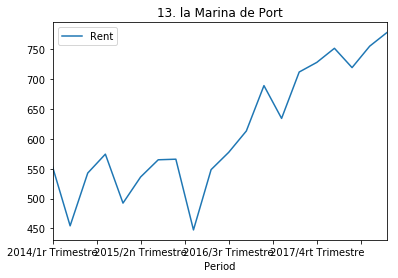

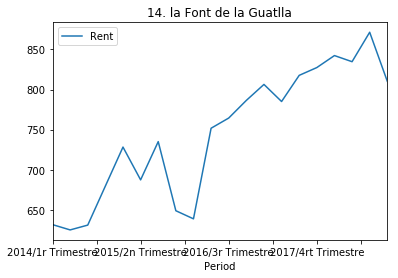

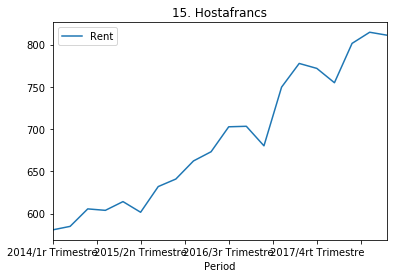

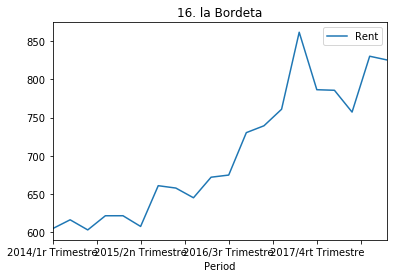

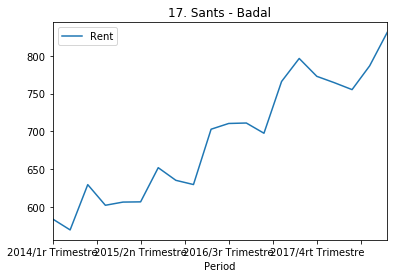

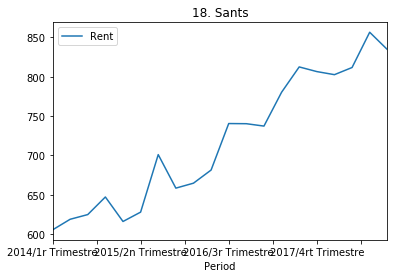

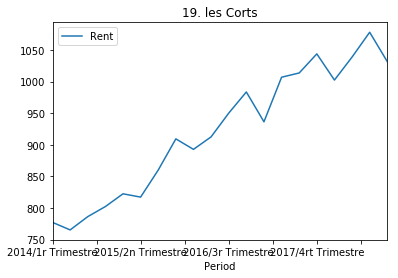

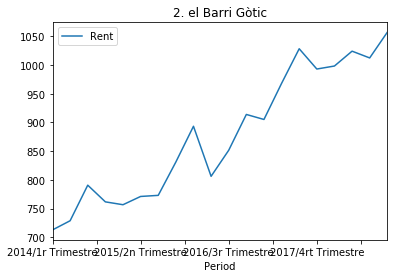

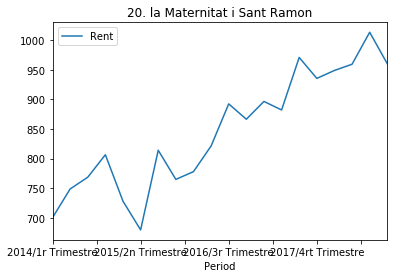

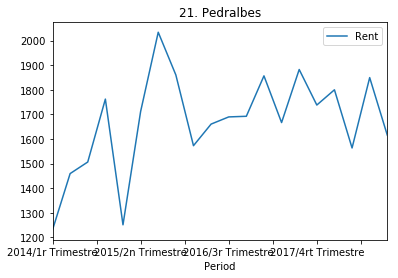

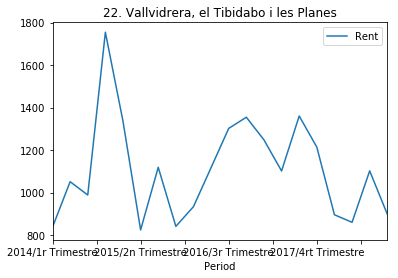

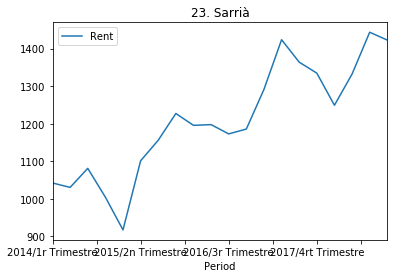

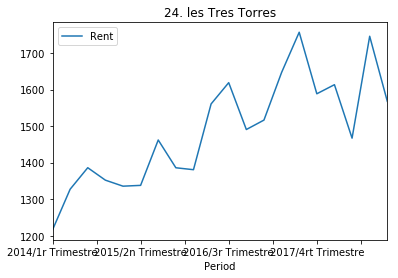

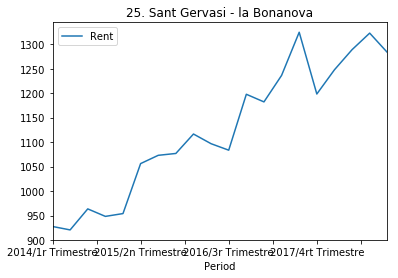

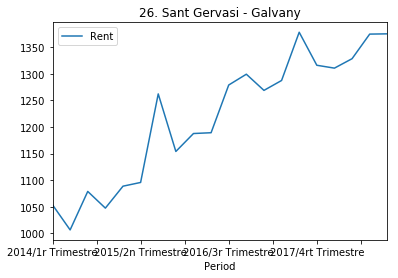

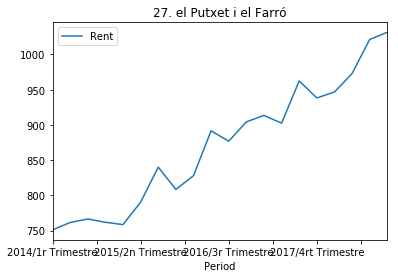

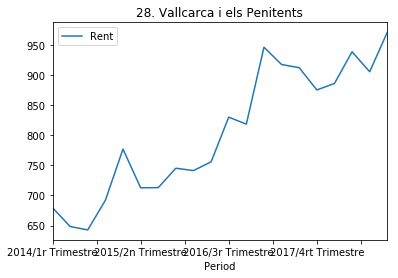

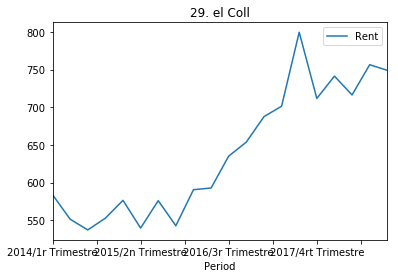

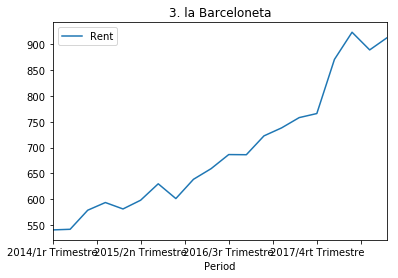

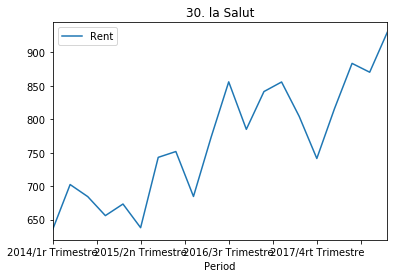

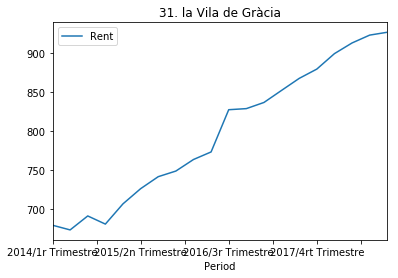

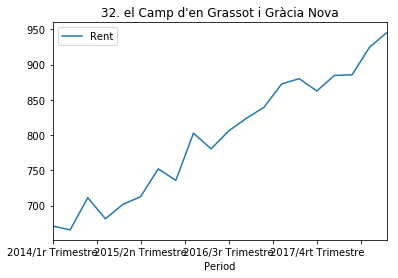

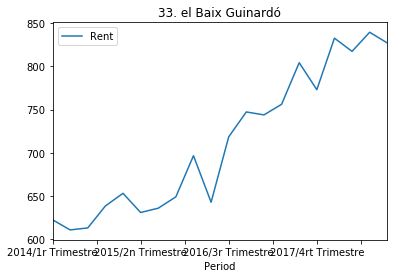

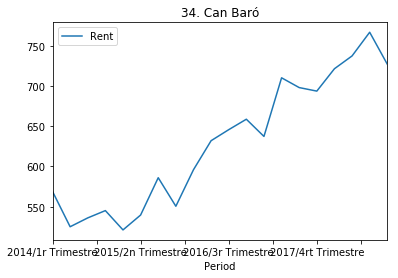

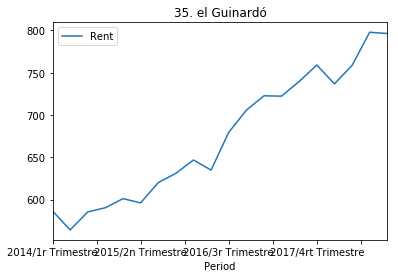

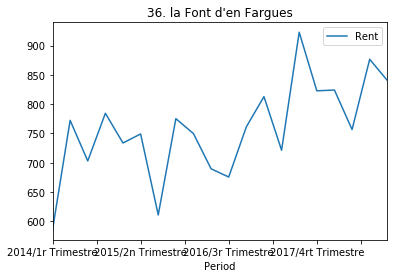

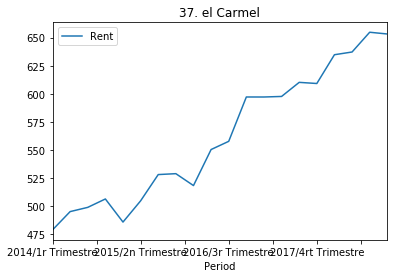

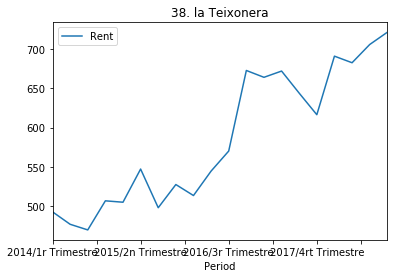

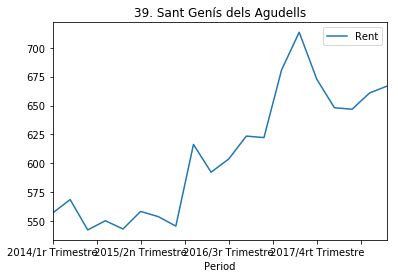

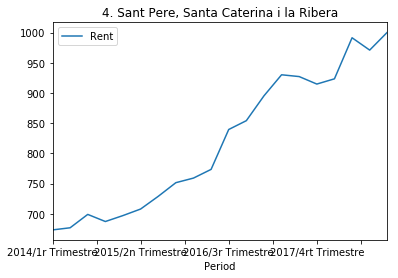

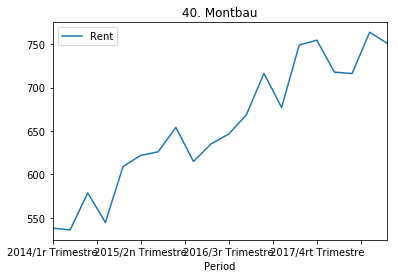

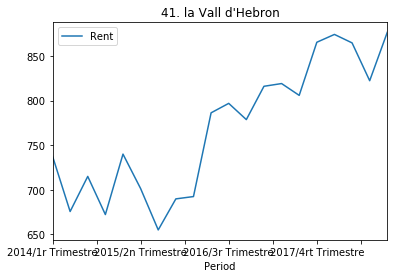

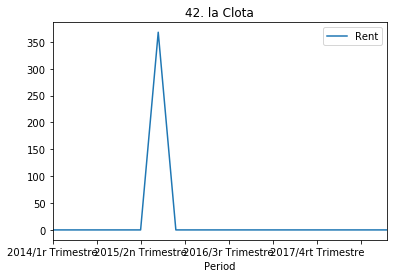

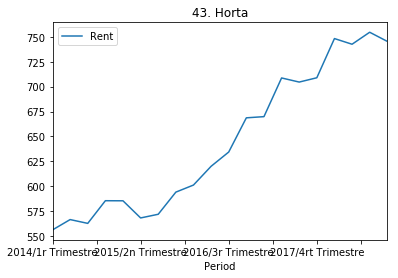

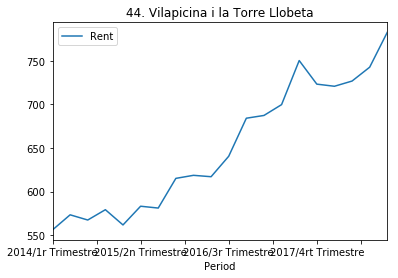

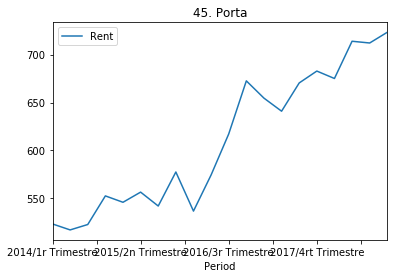

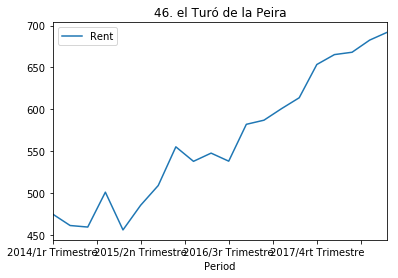

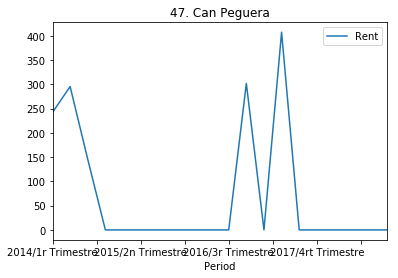

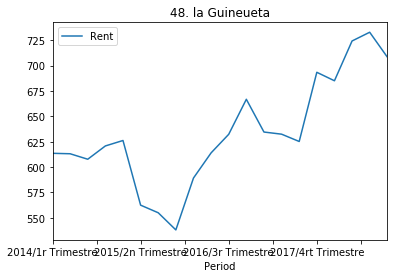

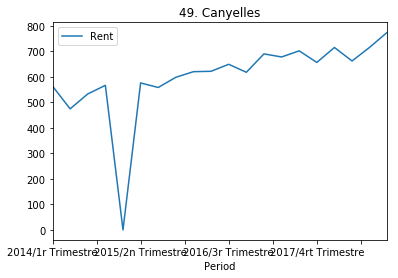

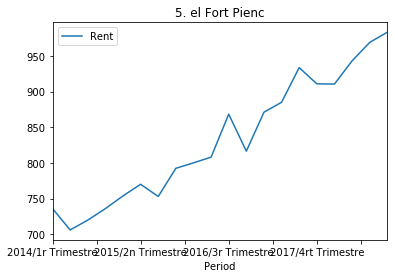

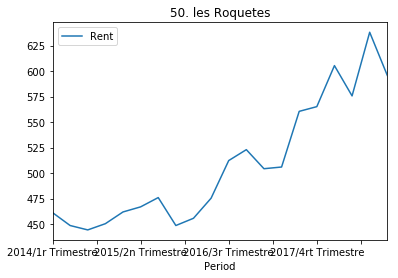

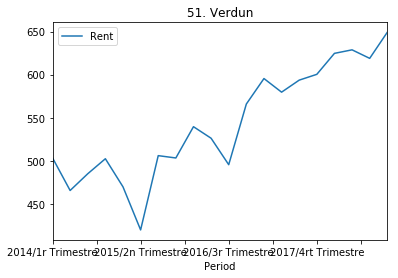

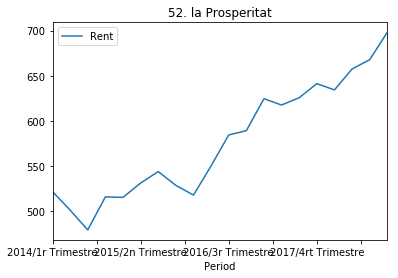

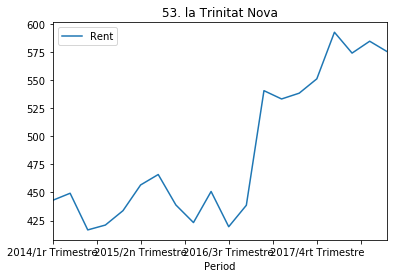

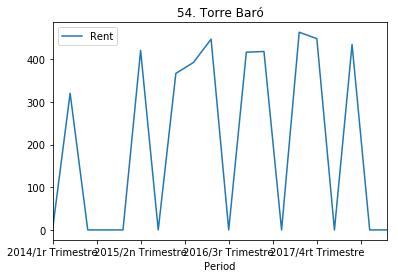

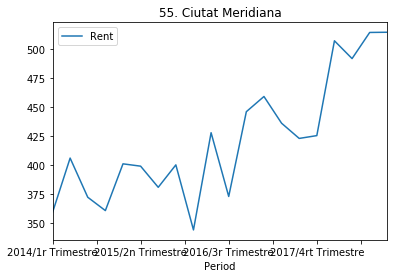

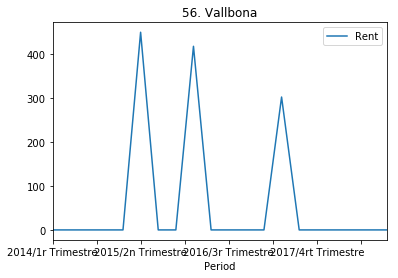

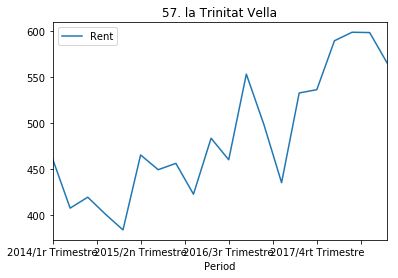

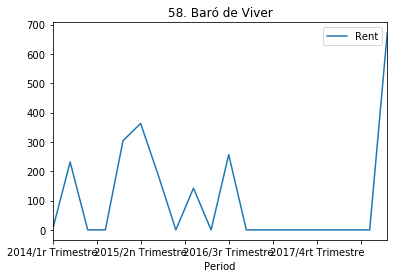

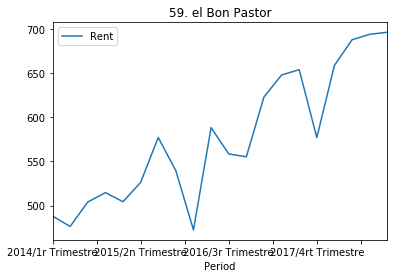

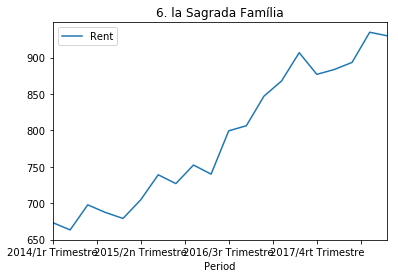

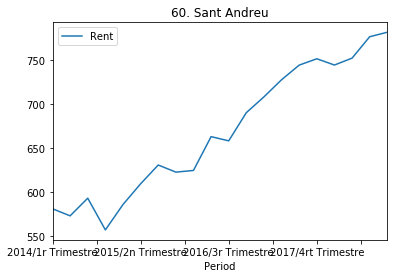

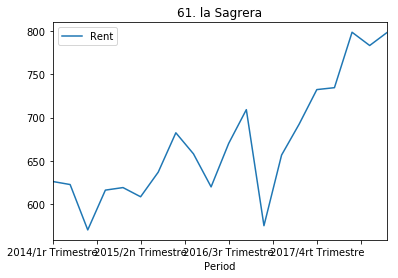

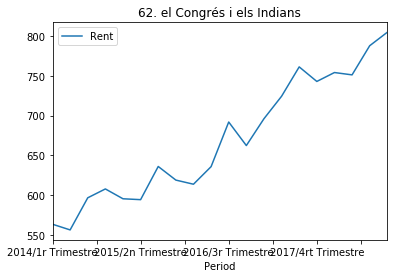

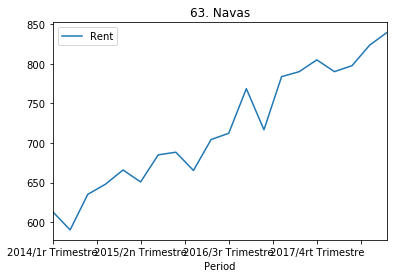

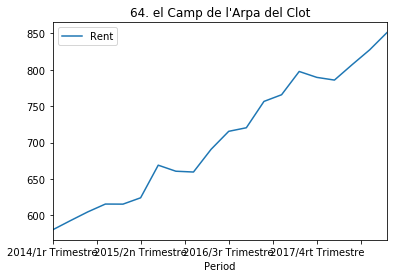

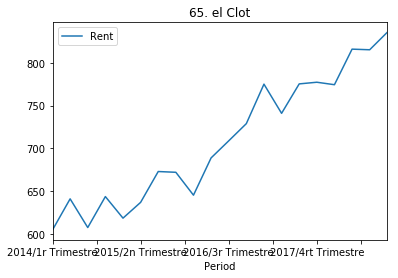

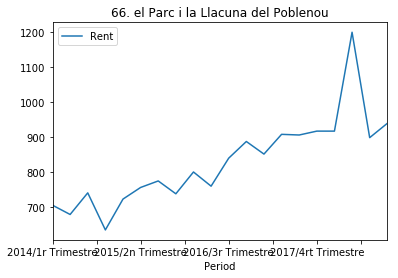

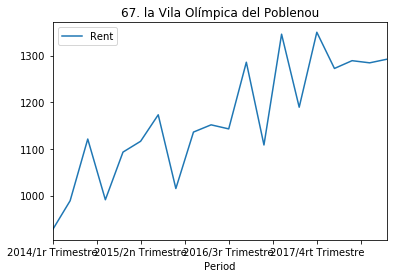

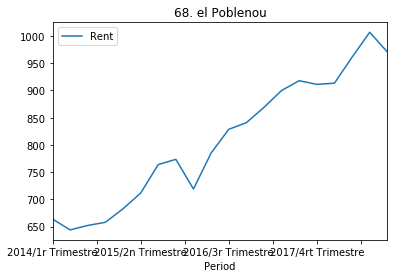

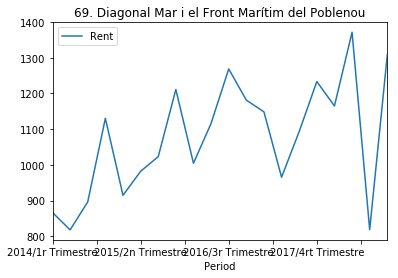

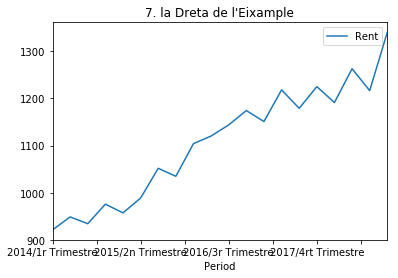

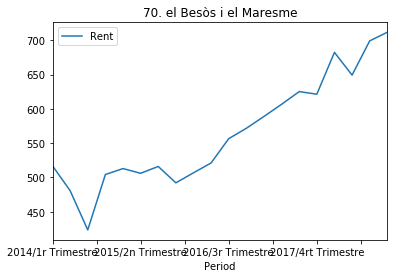

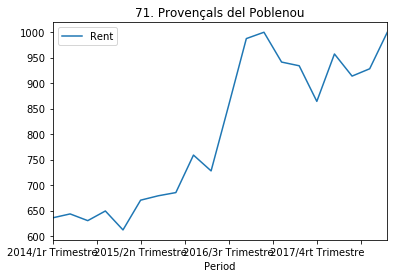

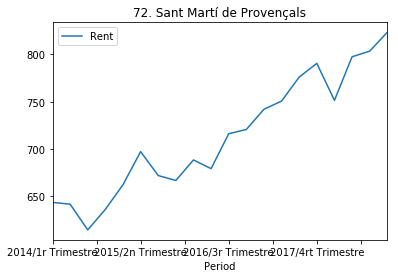

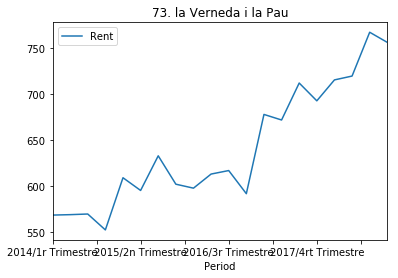

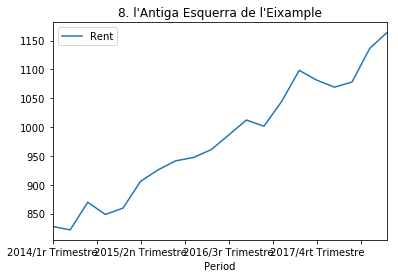

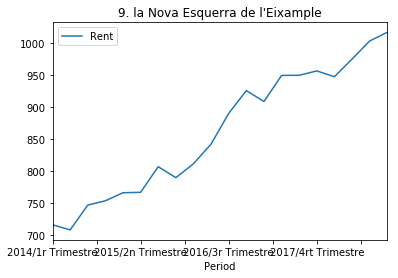

In [7]:
melted_monthly_rates = all_monthly_rates.melt(id_vars = "Barris", var_name="Period", value_name="Rent")

for title, group in melted_monthly_rates.groupby('Barris'):
    group.plot(x='Period', y='Rent', title=title)